In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import requests #"The 'requests' module in Python is used for making HTTP requests."
import PySimpleGUI as sg # PySimpleGUI is a Python library that makes it easy to build user interface applications.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ModuleNotFoundError: No module named 'PySimpleGUI'


## This code creates a currency converter using an API and GUI. It fetches exchange rates from the API, lets users select currencies and enter amounts, then calculates and displays converted values in the GUI. Error handling ensures a smooth experience.

* In order to run the algorithm, you need to sign up for free on the fixer.io website and obtain your API key.

### Algorithm interface: 

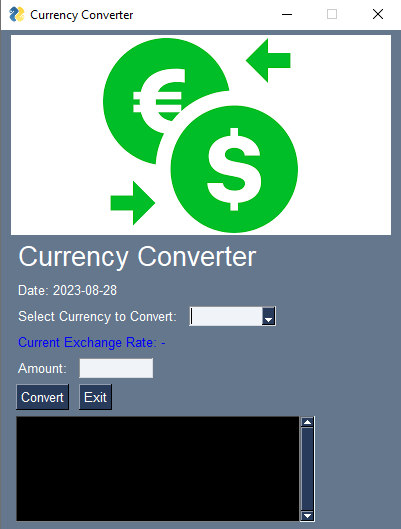

In [ ]:
# Define the main function
def main():
    # Make an HTTP GET request to retrieve exchange rate data
    response = requests.get("Register on Fixer.io and provide your API address here.")
    #response = requests.get("http://data.fixer.io/api/latest?access_key=91214e7b42d1b9132112as214") # for example
    data = response.json()  # Convert the response to a JSON format
    rates = data["rates"]  # Extract the exchange rates
    date = data["date"]  # Extract the date of the exchange rates
    types_of_currencies_list = list(rates.keys())  # Create a list of available currency types

    # Define the layout of the graphical user interface
    layout = [
        [sg.Image(filename=r"images.png", size=(400, 200), pad=((0, 0), (0, 0)), background_color='white')],
        [sg.Text('Currency Converter', font=('Helvetica', 20))],
        [sg.Text(f'Date: {date}')],
        [sg.Text('Select Currency to Convert:'), sg.Combo(types_of_currencies_list, key='_currency_', size=(10, 1))],
        [sg.Text('Current Exchange Rate: -', key='_guncelkur_', text_color="blue")],
        [sg.Text('Amount:'), sg.InputText(key='_amount_', size=(10, 1))],
        [sg.Button('Convert', key='_exchange_'), sg.Exit()],
        [sg.Output(size=(40, 10), background_color="black", text_color="red", font=("Helvetica", 10), key="_OUTPUT_")],
    ]

    # Create a window using the defined layout
    window = sg.Window('Currency Converter', layout, size=(400, 500))

    # Enter the event loop
    while True:
        event, values = window.read()  # Read events and values from the window
        if event in (sg.WIN_CLOSED, 'Exit'):  # Exit the loop if the window is closed or Exit button is clicked
            break

        if event == '_exchange_':  # If Convert button is clicked
            select_currency = values['_currency_']  # Get the selected currency from the dropdown
            try:
                price = float(rates[select_currency])  # Get the exchange rate for the selected currency
                turk_lirasi = float(rates["TRY"])  # Get the exchange rate for Turkish Lira
                tl_value = (1 / price) * turk_lirasi  # Calculate the equivalent Turkish Lira value
                window['_guncelkur_'].update(value=f'Current Rate: {tl_value:.4f}')  # Update the UI with the rate
                amount = values['_amount_']  # Get the amount to convert
                try:
                    amount = float(amount)
                    calc = amount * tl_value  # Calculate the converted amount
                    print(f"{select_currency.upper()}/TRY: {calc:.4f}")  # Print the converted amount
                except ValueError:
                    print("Please specify an amount.")
                    print(f"1 {select_currency.upper()}/TRY: {tl_value:.4f}")
            except KeyError:
                print("Please select a currency to convert!!!")

    window.close()  # Close the GUI window when the loop exits

# Run the main function if the script is executed directly
if __name__ == "__main__":
    main()


## CONCLUSION

If you have any question, I will be happy to hear it!!! Thanks